In [ ]:
#52. What is a Category data type?

In [1]:
import pandas as pd
import os

In [ ]:
os.getcwd()

In [2]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [ ]:
movies.head()

In [ ]:
len(movies)

In [ ]:
movies.info()

In [3]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [ ]:
movies.describe()

In [4]:
#Change categories

movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [5]:
movies.Genre.cat.categories #unique()

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [ ]:
movies.describe()

In [ ]:
#53. Working with JointPlots

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Jointplots

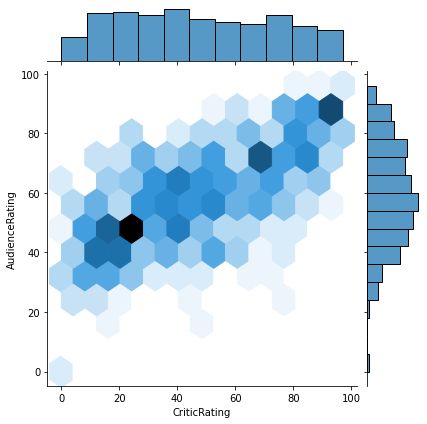

In [7]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind="hex")

In [ ]:
j = sns.jointplot(data=movies, y='CriticRating', x='BudgetMillions', kind="hex")

In [ ]:
movies[movies.BudgetMillions > 200]

In [ ]:
j = sns.jointplot(data=movies, x='AudienceRating', y='BudgetMillions', kind='hex')

---

In [ ]:
#54. Histograms

In [ ]:
m1 = sns.distplot(movies.AudienceRating, bins=20)

In [ ]:
m2 = sns.distplot(movies.CriticRating, bins=20)

In [ ]:
sns.set_style("white")
n1 = plt.hist(movies.AudienceRating, bins=20)

In [ ]:
sns.set_style("darkgrid")
n1 = plt.hist(movies.CriticRating, bins=20)

---

In [ ]:
#55. Stacked histograms in Python

In [ ]:
movies.Genre.cat.categories

In [ ]:
#Not ideal
plt.hist([movies[movies.Genre == "Action"].BudgetMillions, 
          movies[movies.Genre == "Adventure"].BudgetMillions, 
          movies[movies.Genre == "Comedy"].BudgetMillions, 
          movies[movies.Genre == "Drama"].BudgetMillions, 
          movies[movies.Genre == "Horror"].BudgetMillions, 
          movies[movies.Genre == "Romance"].BudgetMillions, 
          movies[movies.Genre == "Thriller"].BudgetMillions], 
          bins=15, stacked=True)
plt.show()

In [ ]:
#Using a loop

l1 = []
labels = []

for i in movies.Genre.cat.categories:
    l1.append(movies[movies.Genre == i].BudgetMillions)
    labels.append(i)
    
h1 = plt.hist(l1, stacked=True, bins=15, label=labels)
plt.legend()
plt.show()

---

In [ ]:
#56. Creating a KDE Plot

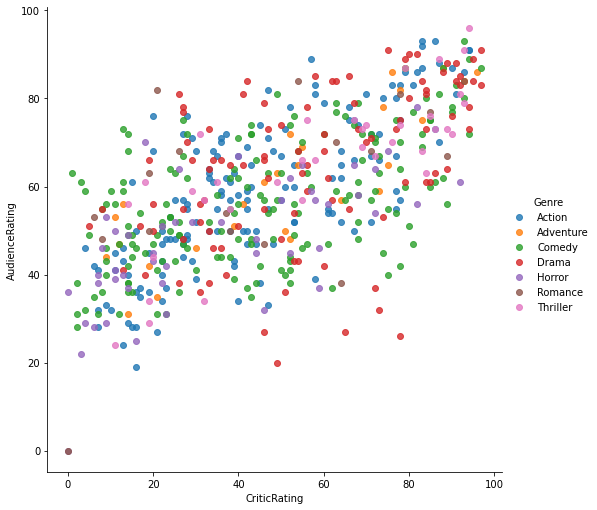

In [8]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', size=7, aspect=1)

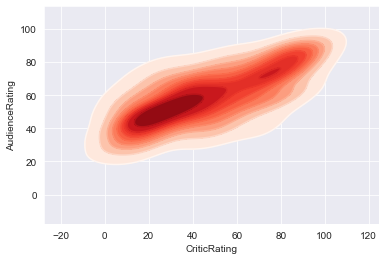

In [52]:
#sns.set_style("darkgrid")
k1a = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

#Tip: shade and outline overlay in order to look better
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

In [ ]:
#57. Working with Subplots()

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

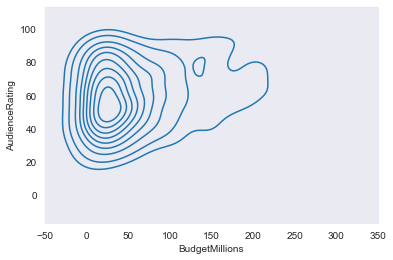

In [11]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

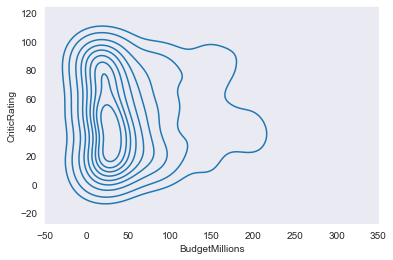

In [12]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

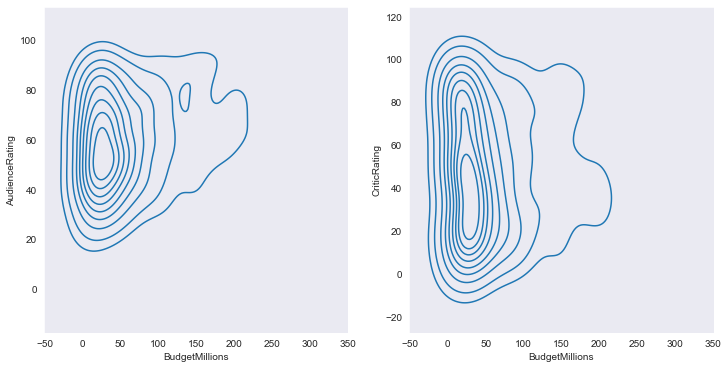

In [13]:
#for 1 dimensional array 
f, axes = plt.subplots(1, 2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

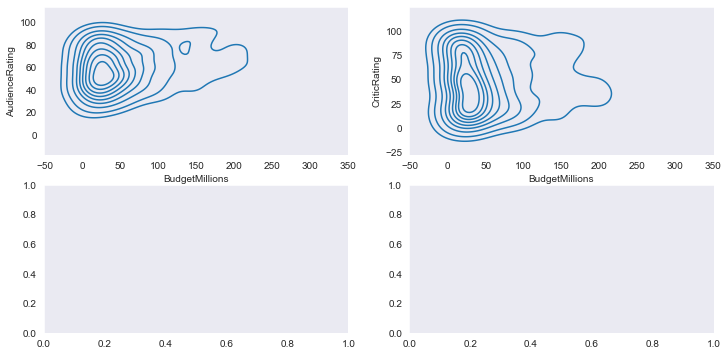

In [14]:
#for 2 dimensional array 
f, ax = plt.subplots(2, 2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[0,1])

[(-50.0, 250.0)]

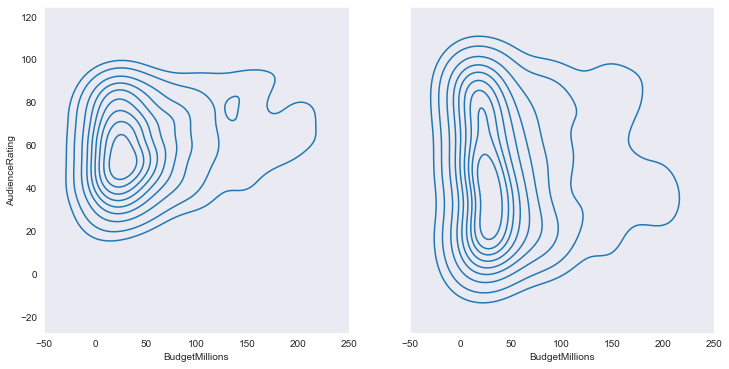

In [15]:
f, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[1])
k1.set(xlim=(-50, 250))

In [16]:
#58. Violinplots vs Boxplots

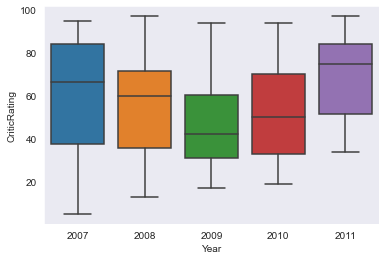

In [22]:
#y = sns.boxplot(data=movies, x='Genre', y='CriticRating')
y = sns.boxplot(data=movies[movies.Genre=="Drama"], x='Year', y='CriticRating')

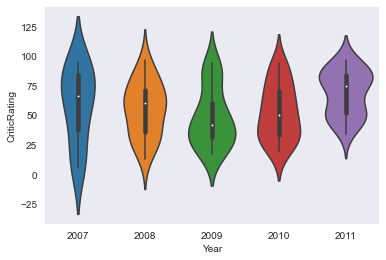

In [23]:
#z = sns.violinplot(data=movies, x='Genre', y='CriticRating')
z = sns.violinplot(data=movies[movies.Genre=="Drama"], x='Year', y='CriticRating')

In [24]:
#59. Creating a Facet Grid

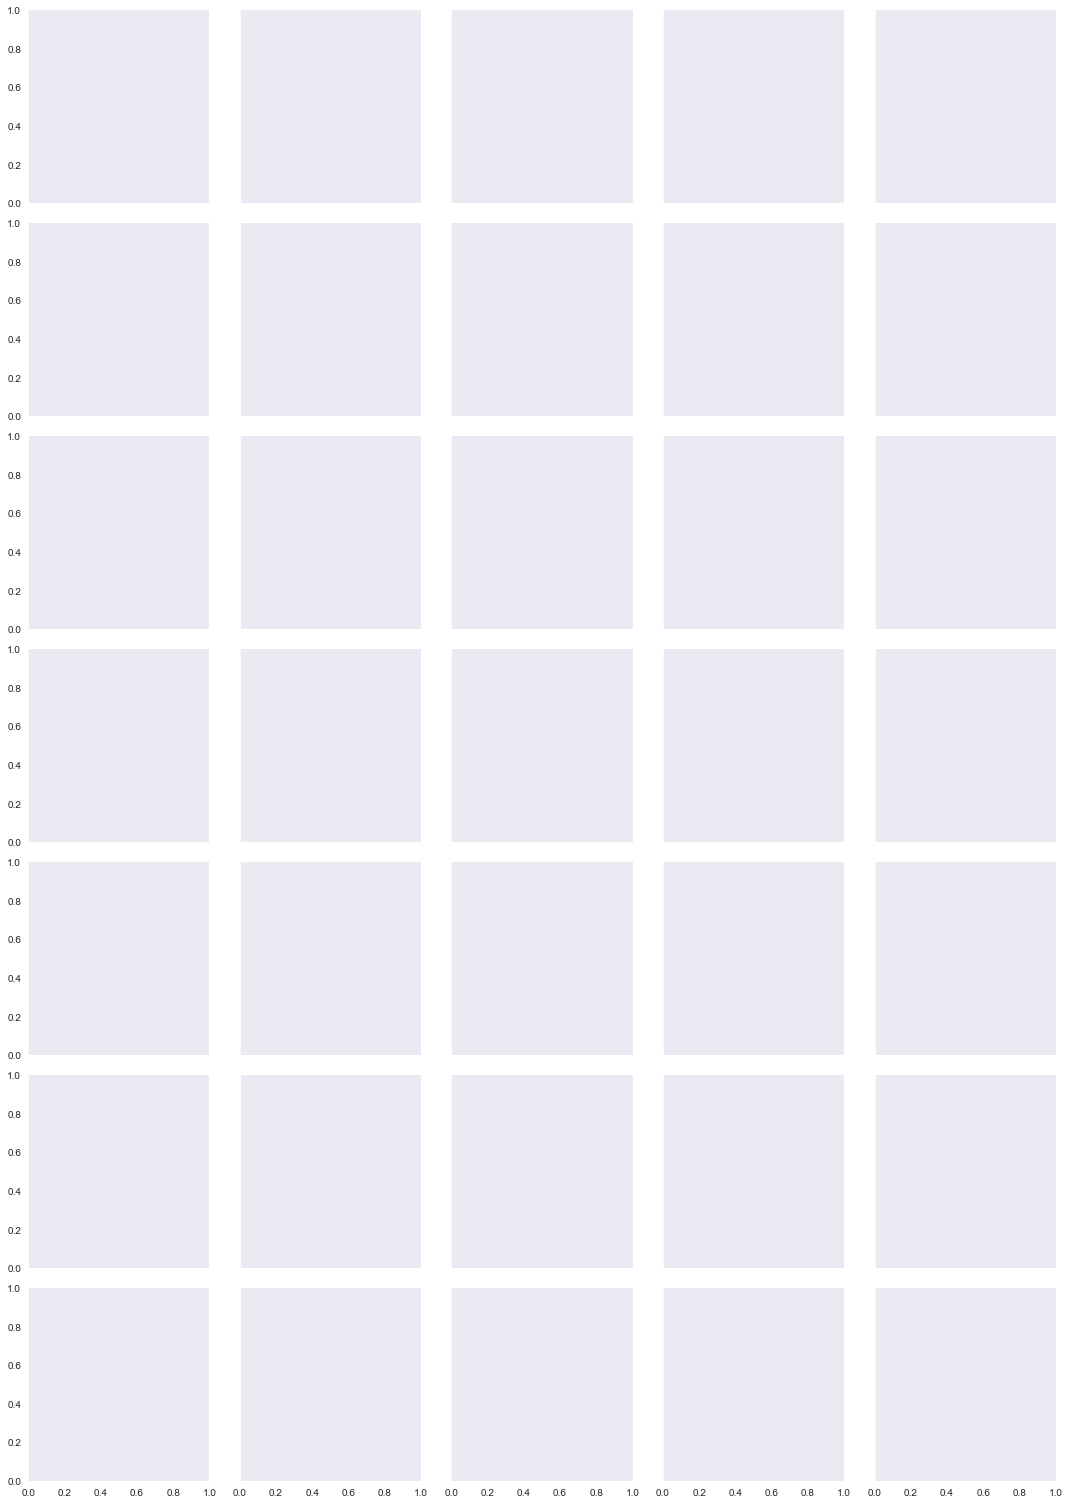

In [26]:
#g = sns.FacetGrid(movies, row='Genre', hue='Genre')
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

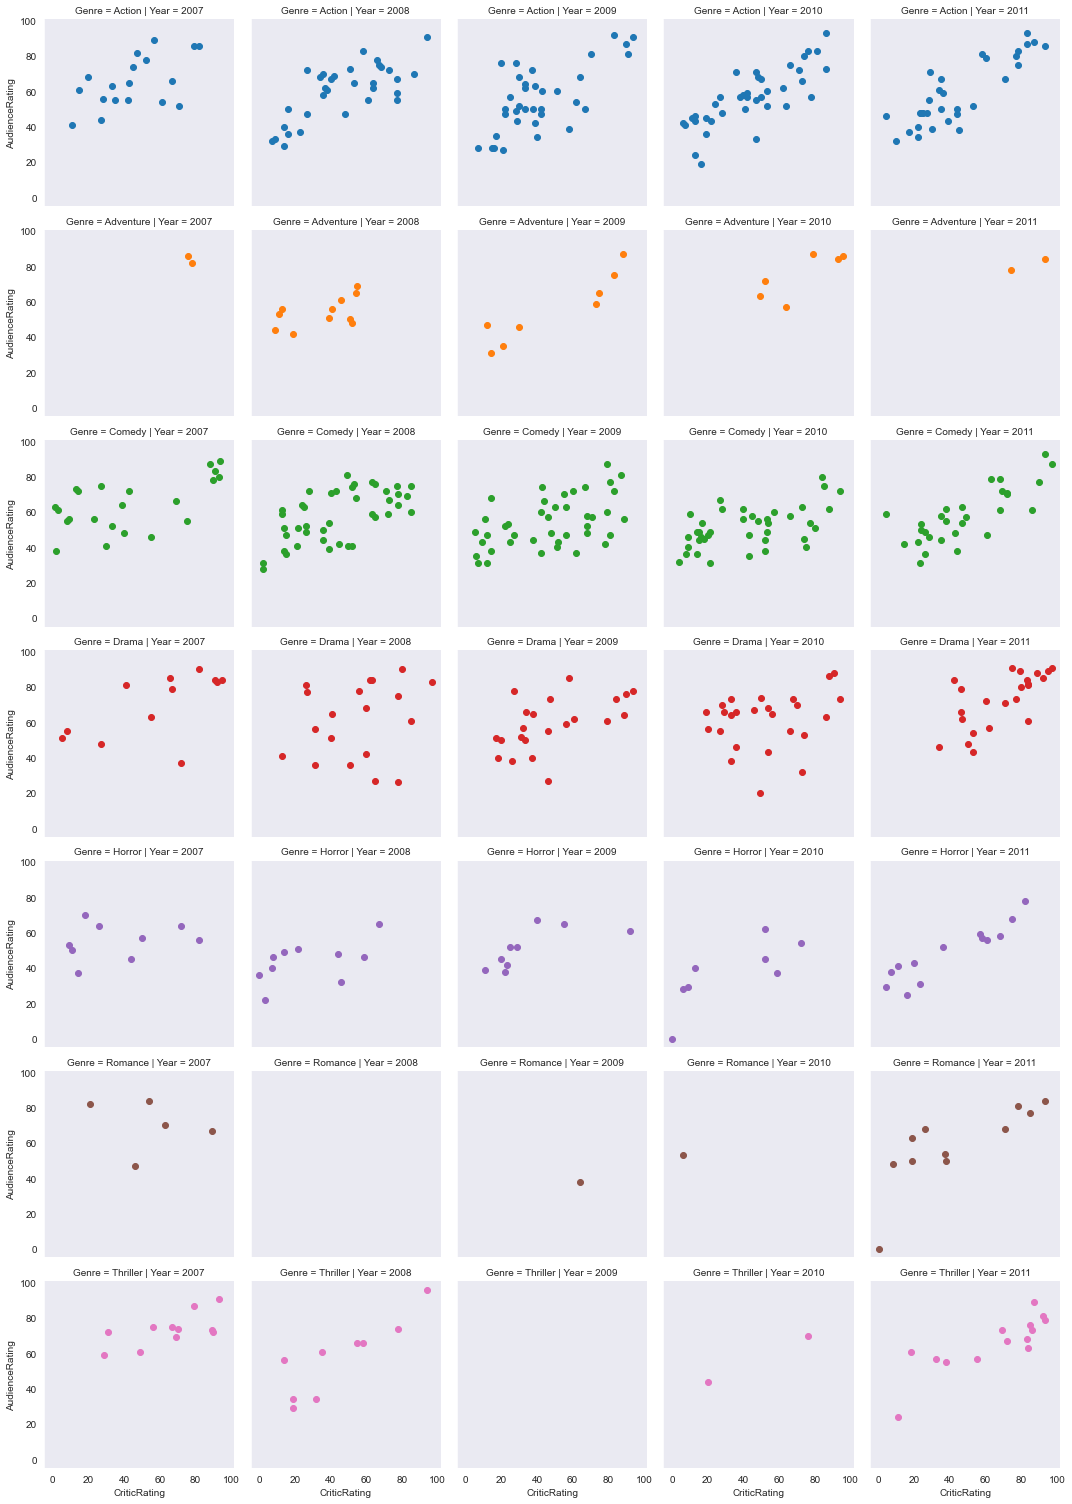

In [28]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

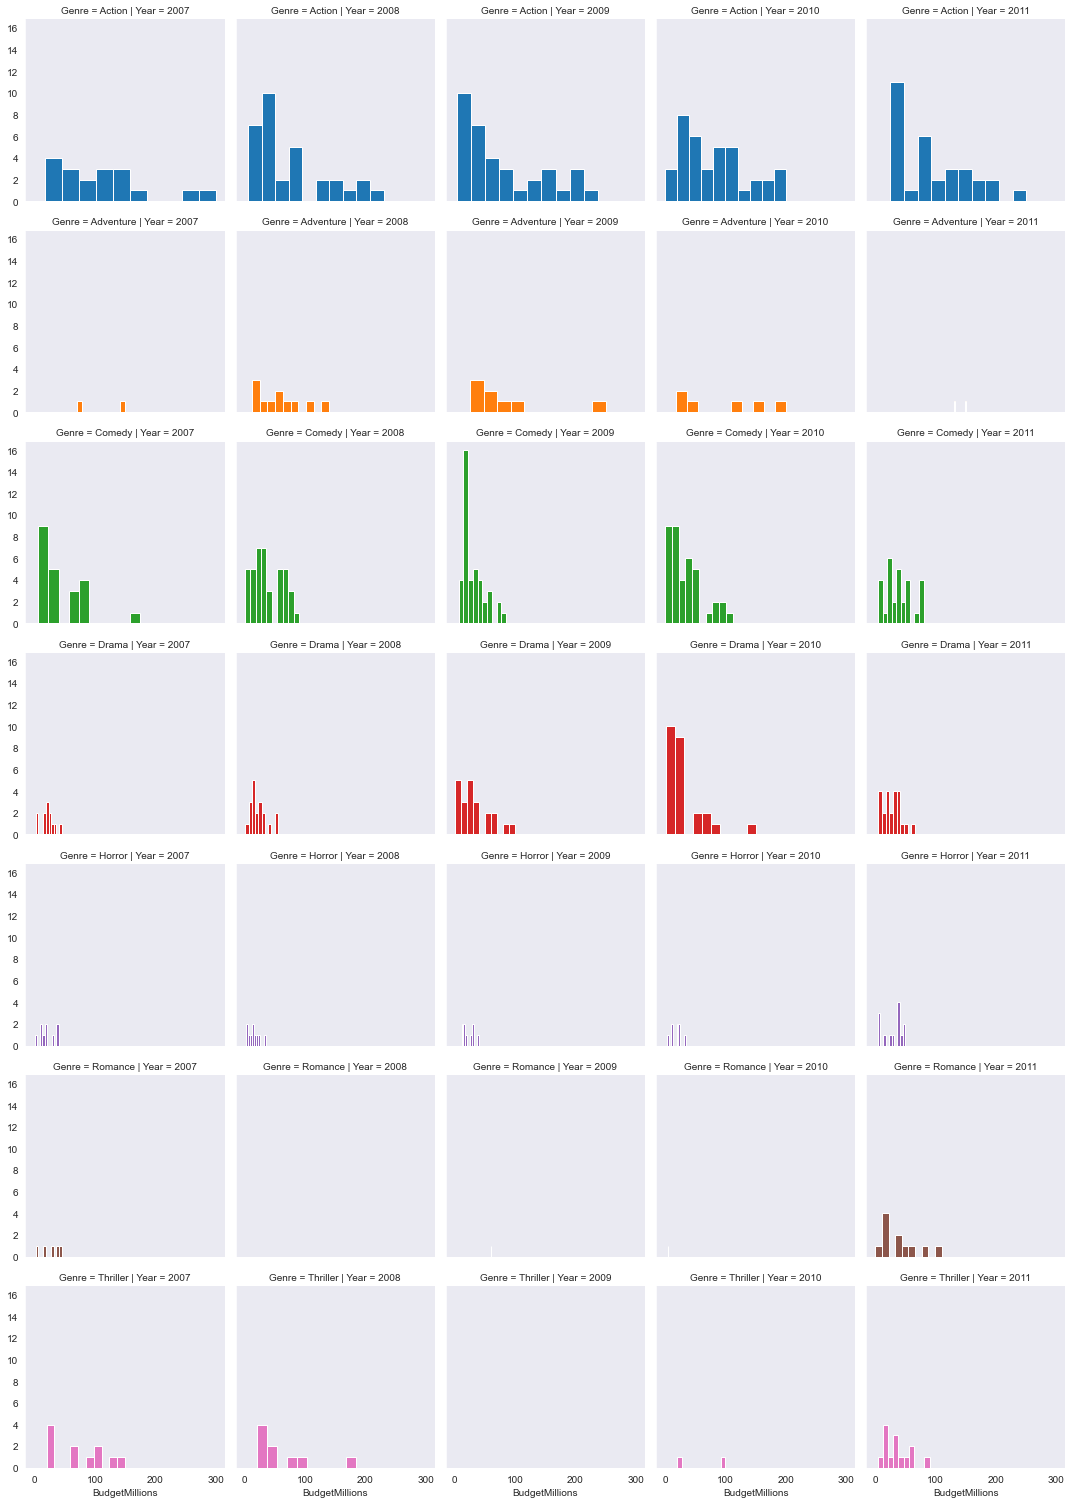

In [29]:
#can populate with any type of chart. Example: histograms
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

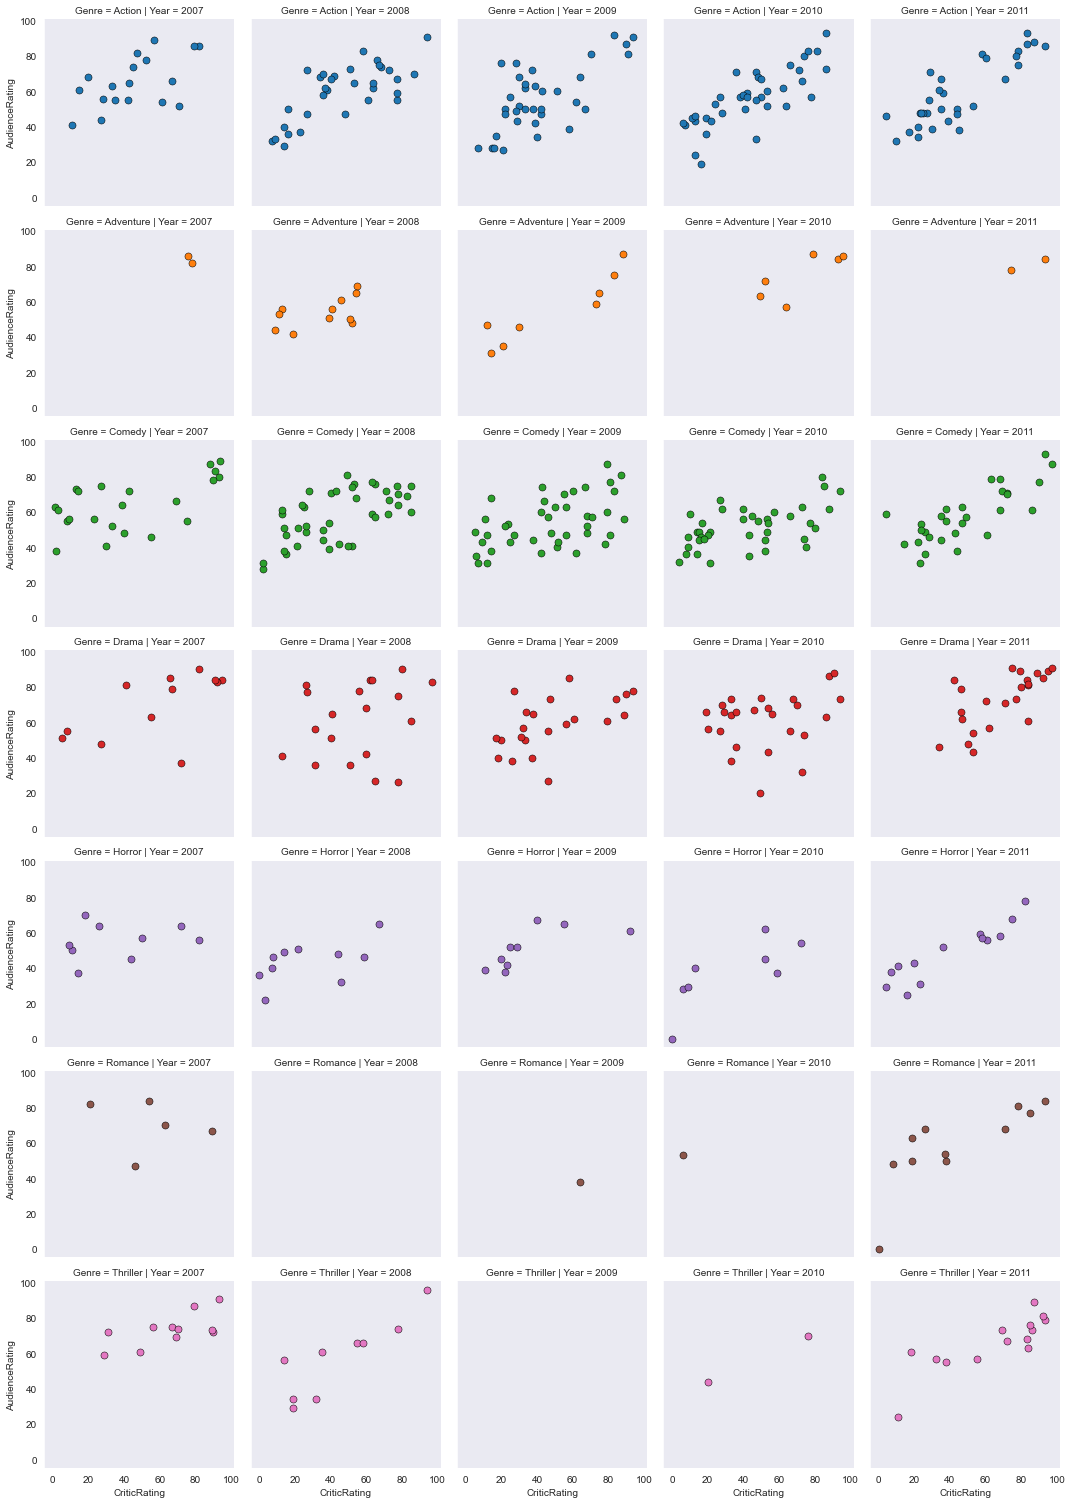

In [30]:
#back to the scatterplots:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

In [31]:
#60. Coordinates and Diagonals

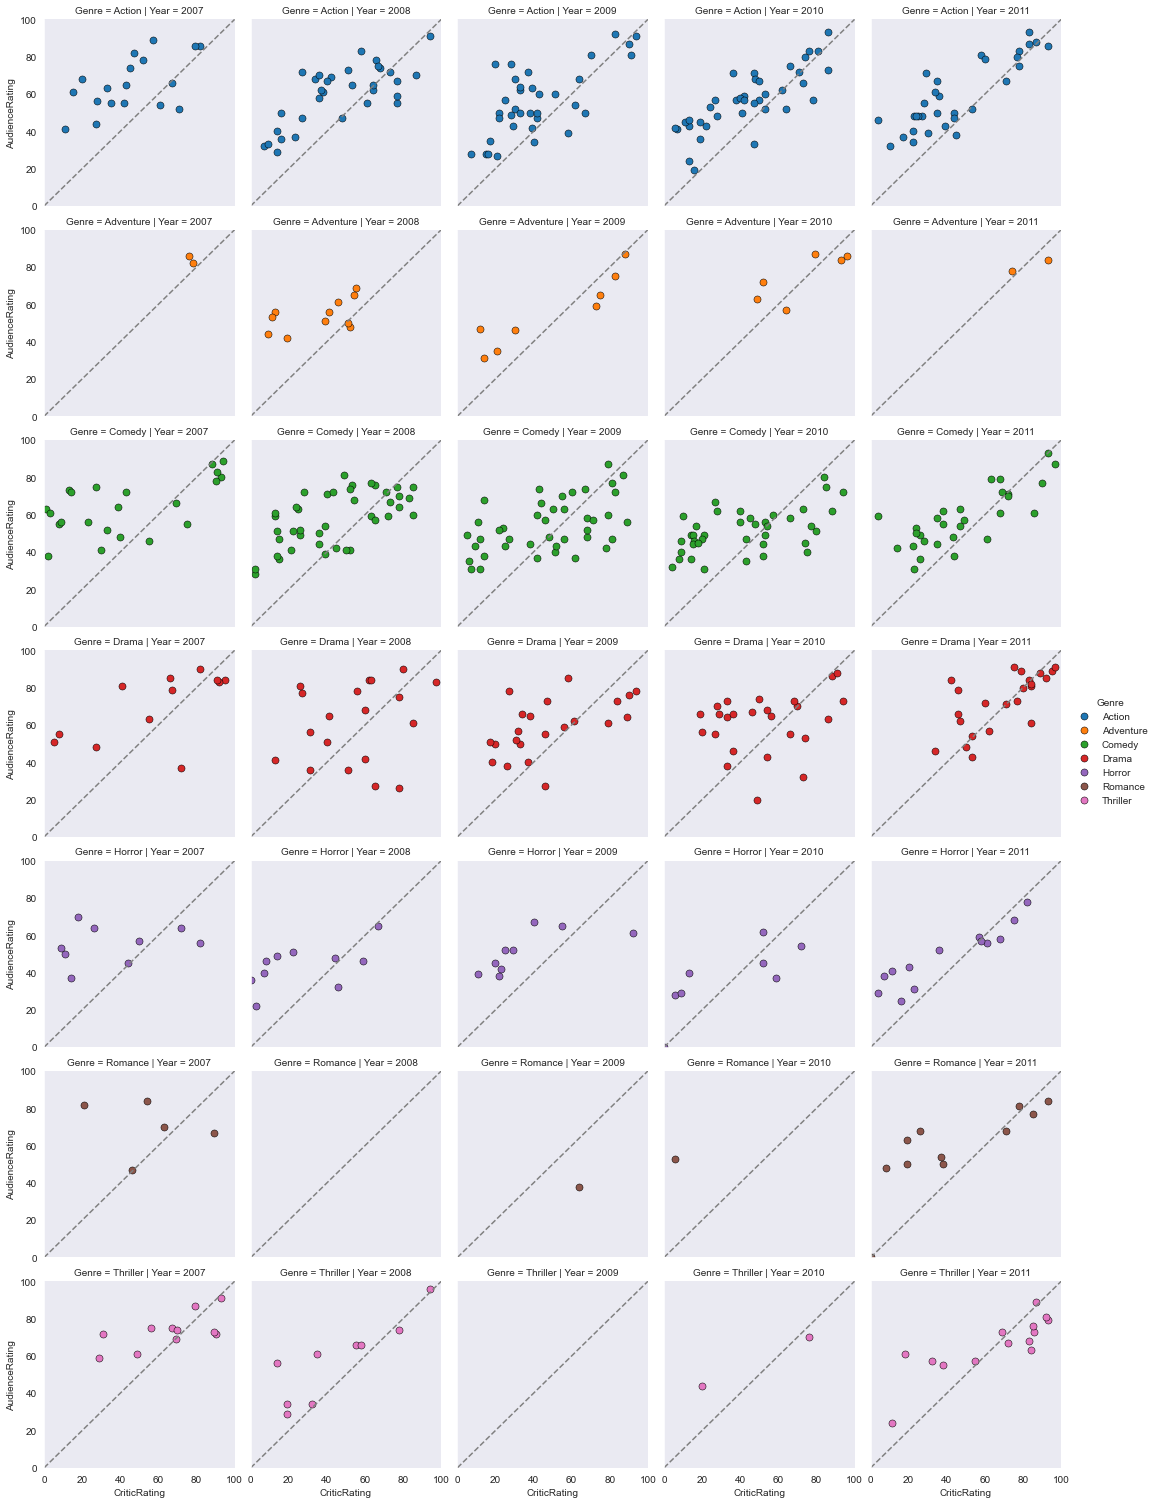

In [36]:
#Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend()

---

In [37]:
#61. Bonus: Building Dashboards in Python

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

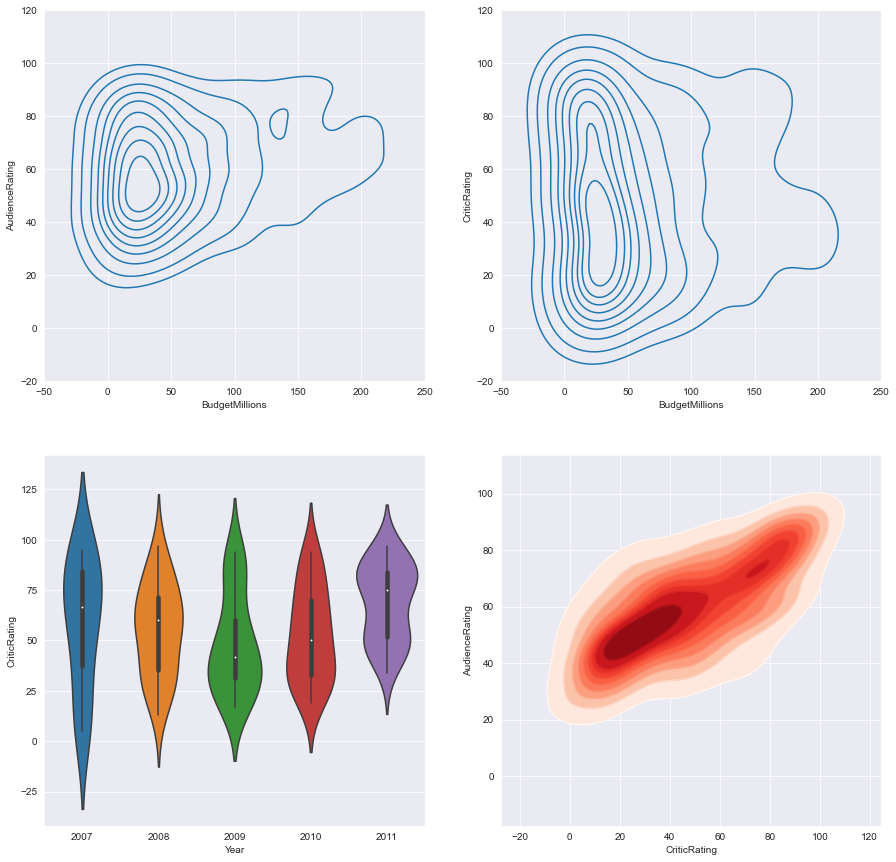

In [60]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15,15))

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])

z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1,0])

k3a = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
k3b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', ax=axes[1,1])

#for plt charts, axes is a pyplot generated object
#axes[1,0].hist(movies.CriticRating, bins=15)

k1.set(xlim=(-50,250), ylim=(-20,120))
k2.set(xlim=(-50,250), ylim=(-20,120))
plt.show()

---

In [61]:
#62. Bonus: Styling Tips

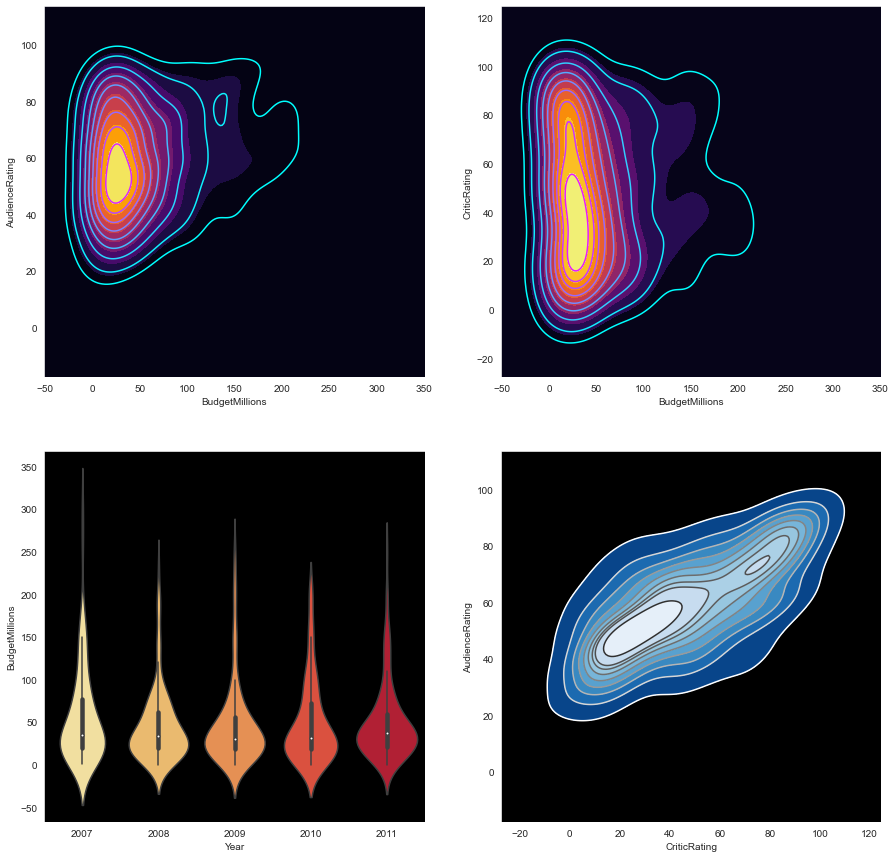

In [94]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2, 2, figsize=(15,15))

#Plot [0,0]
k1a = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='cool', ax=axes[0,0])

#Plot [0,1]
k2a = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='cool', ax=axes[0,1])

#Plot [1,0]
z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', palette='YlOrRd', ax=axes[1,0])

#Plot [1,1]
k3a = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k3b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])

#k1a.set(xlim=(-50,250), ylim=(-20,120))
#k2a.set(xlim=(-50,250), ylim=(-20,120))
plt.show()

---

In [95]:
#63. Finishing Touches

In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

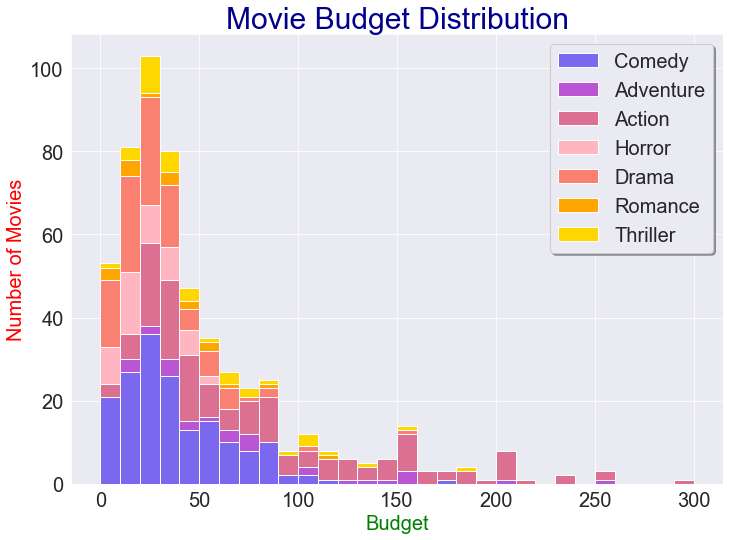

In [133]:
#Thematic edits

list1 = []
mylabels= []
colors=['mediumslateblue', 'mediumorchid', 'palevioletred','lightpink', 'salmon','orange', 'gold']

for gen in movies.Genre.unique():
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
sns.set_style("darkgrid")  

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #Size of A4 paper

h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels, color=colors)

plt.title("Movie Budget Distribution", fontsize=30, color='DarkBlue')
plt.xlabel("Budget", fontsize=20, color="Green")
plt.ylabel("Number of Movies", fontsize=20, color='Red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, fontsize=20, framealpha=1) #Background, rounded edges, *, *, opacity 
plt.show()